In [282]:
# Импортируем необходимые библиотеки и наборы данных, размечаем данные.
import sklearn
import numpy as np
import pandas as pd
money = pd.read_csv('USD_CURRENCY_HISTORY.csv', sep=',')
past= 7 * 4
future = 7
values = money['curs']
start = past
end = len(values) - future
raw_df = []
for i in range(start, end):
    past_and_future_value = values[(i - past):(i + future)]
    raw_df.append(list(past_and_future_value))
past_columns =[f'past_{i}' for i in range(past)]
future_columns =[f'future_{i}' for i in range(future)]    


In [283]:
# Подготавливаем данные для обучения и проверки точности предсказания моделей.
df = pd.DataFrame(raw_df, columns=(past_columns+future_columns))
X = df[past_columns][:-1]
y = df[future_columns][:-1]
X_test = df[past_columns][-1:]
y_test = df[future_columns][-1:]

mean absolute error = 0.39069872464913097
linalg norm = 1.1950827395156283


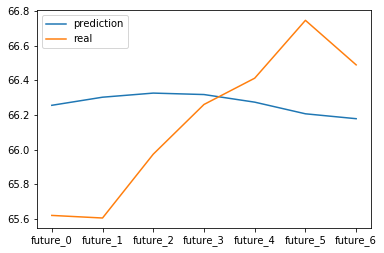

In [284]:
# 1) Предсказания на основе алгоритм линейной регрессии.
from sklearn.linear_model import LinearRegression 
import numpy as np
import matplotlib.pyplot as plt
LinReg = LinearRegression()
LinReg.fit(X, y)
# Анализ предсказанных данных.
prediction = LinReg.predict(X_test)[0]
plt.plot(prediction, label='prediction')
plt.plot(y_test.iloc[0], label='real')
plt.legend()
mean_abs_error =sklearn.metrics.mean_absolute_error(np.array([list(y_test.iloc[0])]), np.array([prediction]))
linalg_norm = np.linalg.norm(y_test - prediction)
print(f'mean absolute error = {mean_abs_error}')
print(f'linalg norm = {linalg_norm}')

mean absolute error = 0.4099785714285754
linalg norm = 1.2439586357672927


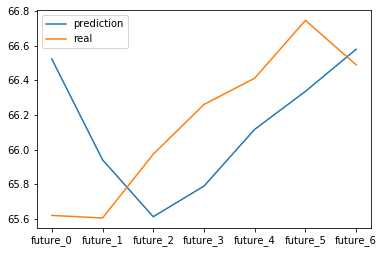

In [285]:
# 2) Прогноз курса доллара на основе алгоритма К ближайших соседей.
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(X, y)
# Анализ предсказанных данных.
prediction = KNN.predict(X_test)[0]
plt.plot(prediction, label='prediction')
plt.plot(y_test.iloc[0], label='real')
plt.legend()
mean_abs_error =sklearn.metrics.mean_absolute_error(np.array([list(y_test.iloc[0])]), np.array([prediction]))
linalg_norm = np.linalg.norm(y_test - prediction)
print(f'mean absolute error = {mean_abs_error}')
print(f'linalg norm = {linalg_norm}')

mean absolute error = 0.2506325750856279
linalg norm = 0.7212891786846913


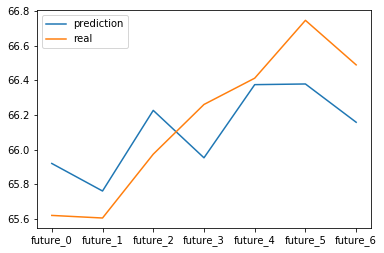

In [286]:
# 3) Предсказание курса доллара на основе нейронной сети. 
from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(max_iter=2000, hidden_layer_sizes=200, random_state=40)
MLP.fit(X, y)
# Анализ предсказанных данных.
prediction = MLP.predict(X_test)[0]
plt.plot(prediction, label='prediction')
plt.plot(y_test.iloc[0], label='real')
plt.legend()
mean_abs_error =sklearn.metrics.mean_absolute_error(np.array([list(y_test.iloc[0])]), np.array([prediction]))
linalg_norm = np.linalg.norm(y_test - prediction)
print(f'mean absolute error = {mean_abs_error}')
print(f'linalg norm = {linalg_norm}')

mean absolute error = 0.33183978494624405
linalg norm = 0.982392164882554


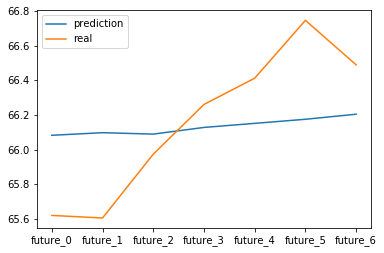

In [287]:
# 4) Предсказание курса доллара на основе деревьев решений.
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=10, min_samples_split=20, min_weight_fraction_leaf=0.13)
regressor.fit(X, y)
# Анализ предсказанных данных.
prediction = regressor.predict(X_test)[0]
plt.plot(prediction, label='prediction')
plt.plot(y_test.iloc[0], label='real')
plt.legend()
mean_abs_error =sklearn.metrics.mean_absolute_error(np.array([list(y_test.iloc[0])]), np.array([prediction]))
linalg_norm = np.linalg.norm(y_test - prediction)
print(f'mean absolute error = {mean_abs_error}')
print(f'linalg norm = {linalg_norm}')    

In [288]:
regressor


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=20, min_weight_fraction_leaf=0.13,
                      presort=False, random_state=10, splitter='best')

mean absolute error = 0.39997720891943594
linalg norm = 1.1682858587901321


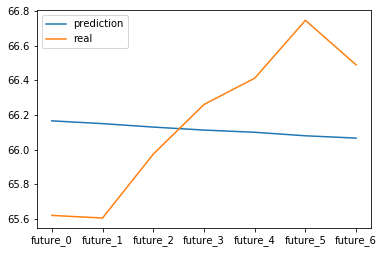

In [289]:
# 5) Предсказание курса доллара на основе случайного леса.
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=300, random_state=40, n_estimators=500, min_samples_leaf=78)
regr.fit(X, y)
# Анализ предсказанных данных.
prediction = regr.predict(X_test)[0]
plt.plot(prediction, label='prediction')
plt.plot(y_test.iloc[0], label='real')
plt.legend()
mean_abs_error =sklearn.metrics.mean_absolute_error(np.array([list(y_test.iloc[0])]), np.array([prediction]))
linalg_norm = np.linalg.norm(y_test - prediction)
print(f'mean absolute error = {mean_abs_error}')
print(f'linalg norm = {linalg_norm}')    

In [214]:
regr


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=300,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=70,
                      n_jobs=None, oob_score=False, random_state=20, verbose=0,
                      warm_start=False)

In [293]:
from sklearn.preprocessing import PolynomialFeatures
PF = PolynomialFeatures()
PF.fit(X, y)
prediction = PF.predict(X_test)[0]
plt.plot(prediction, label='prediction')
plt.plot(y_test.iloc[0], label='real')
plt.legend()
mean_abs_error =sklearn.metrics.mean_absolute_error(np.array([list(y_test.iloc[0])]), np.array([prediction]))
linalg_norm = np.linalg.norm(y_test - prediction)
print(f'mean absolute error = {mean_abs_error}')
print(f'linalg norm = {linalg_norm}')    


AttributeError: 'PolynomialFeatures' object has no attribute 'predict'